### Points to analysis:
1. Which team has spend more money and on which type of players?

2. What was the trend of spending money by all teams?

3. Who has got the highest money in the auction?

4. Analysis every team spend pattern?

5. Analysis every category of players who has got more money and who has got less money in auction?

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
df = pd.read_csv('ipl_2025_auction_players.csv')

In [9]:
df.head()

,Players,Team,Type,Base,Sold
0,Virat Kohli,RCB,BAT,-,21.00
1,Rajat Patidar,RCB,BAT,-,11.00
2,Yash Dayal,RCB,BOWL,-,5.00
3,Jasprit Bumrah,MI,BOWL,-,18.00
4,Suryakumar Yadav,MI,BAT,-,16.35


In [11]:
df.dtypes

Players    object
Team       object
Type       object
Base       object
Sold       object
dtype: object

In [13]:
df['Base']=df['Base'].replace({'-':0}).astype(float).astype(int)

In [15]:
df['Sold']=df['Sold'].replace({'Unsold':0,'TBA':0}).astype(float)
df.dtypes

Players     object
Team        object
Type        object
Base         int32
Sold       float64
dtype: object

In [17]:
df.drop_duplicates(keep='first',inplace=True)

In [19]:
df.head()

,Players,Team,Type,Base,Sold
0,Virat Kohli,RCB,BAT,0,21.00
1,Rajat Patidar,RCB,BAT,0,11.00
2,Yash Dayal,RCB,BOWL,0,5.00
3,Jasprit Bumrah,MI,BOWL,0,18.00
4,Suryakumar Yadav,MI,BAT,0,16.35


In [21]:
unsold=df[df['Sold']==0]

In [23]:
sold=df[df['Sold']>0.0]

In [25]:
unsold.head()

,Players,Team,Type,Base,Sold
64,David Warner,-,BAT,2,0.0
72,Jonny Bairstow,-,BAT,2,0.0
88,Waqar Salamkheil,-,BOWL,0,0.0
91,Yash Dhull,-,BAT,0,0.0
95,Anmolpreet Singh,-,BAT,0,0.0


In [27]:
sold.head()

,Players,Team,Type,Base,Sold
0,Virat Kohli,RCB,BAT,0,21.00
1,Rajat Patidar,RCB,BAT,0,11.00
2,Yash Dayal,RCB,BOWL,0,5.00
3,Jasprit Bumrah,MI,BOWL,0,18.00
4,Suryakumar Yadav,MI,BAT,0,16.35


In [31]:
teamSpend=sold.groupby('Team').agg({'Sold':'sum'}).sort_values(by='Sold',ascending=False).reset_index()

In [33]:
def highest_team_player(team_name):
    team_df=sold[sold['Team']==team_name]
    highest_price=team_df.loc[team_df['Sold'].idxmax()]
    return highest_price

In [35]:
highest_team_player(teamSpend.iloc[0][0])

C:\Users\welcome\AppData\Local\Temp\ipykernel_7484\4098983527.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  highest_team_player(teamSpend.iloc[0][0])


Players    Ruturaj Gaikwad
Team                   CSK
Type                   BAT
Base                     0
Sold                  18.0
Name: 13, dtype: object

#### Ques - Which team has spend more money and on which type of players?

Ans - CSK has spend more money among all teams and they have spend 18 cr. on Ruturaj Gaikwad

In [46]:
teamwise_analysis =sold.groupby(['Team','Type']).agg({'Sold':'sum'}).reset_index()

In [48]:
teamwise_analysis.head()

,Team,Type,Sold
0,CSK,AR,54.55
1,CSK,BAT,32.80
2,CSK,BOWL,32.60
3,DC,AR,23.35
4,DC,BAT,46.50


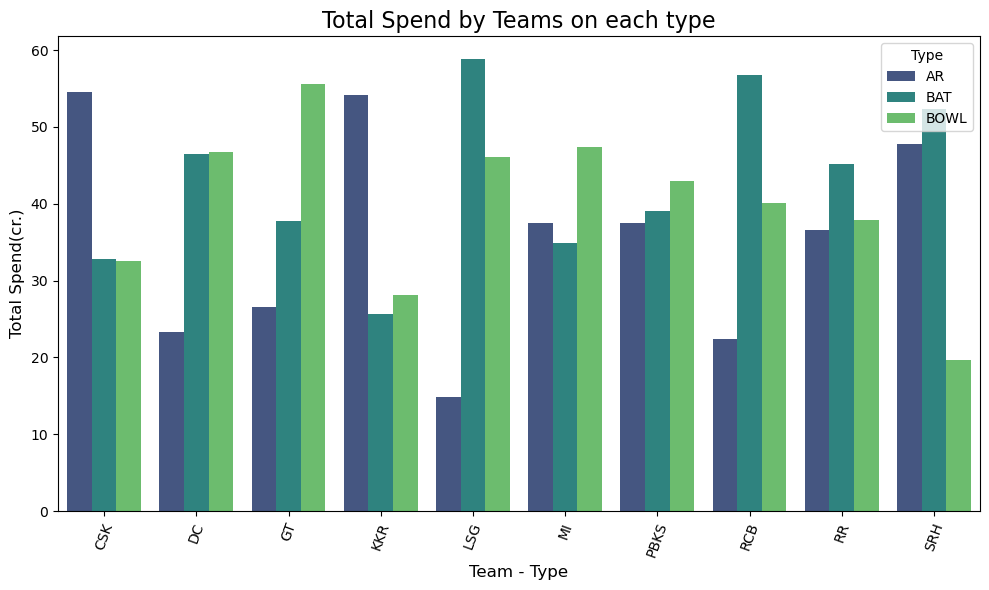

In [52]:
plt.figure(figsize=(10, 6))
sns.barplot(data=teamwise_analysis, x='Team', y='Sold', hue="Type", palette='viridis')
plt.title('Total Spend by Teams on each type', fontsize=16)
plt.xlabel('Team - Type', fontsize=12)
plt.ylabel('Total Spend(cr.)', fontsize=12)
plt.xticks(rotation=70)
plt.tight_layout()
plt.show()

#### Ques - What was the trend of spending money by all teams?
Ans - Check the bar graph above 

In [54]:
sold.loc[sold['Sold'].idxmax()]

Players    Rishabh Pant
Team                LSG
Type                BAT
Base                  2
Sold               27.0
Name: 48, dtype: object

#### Ques - Who has got the highest money in the auction?
Ans - Rishabh Pant

In [61]:
typewise_number =sold.groupby(['Team','Type']).size().reset_index(name='Type_Count')

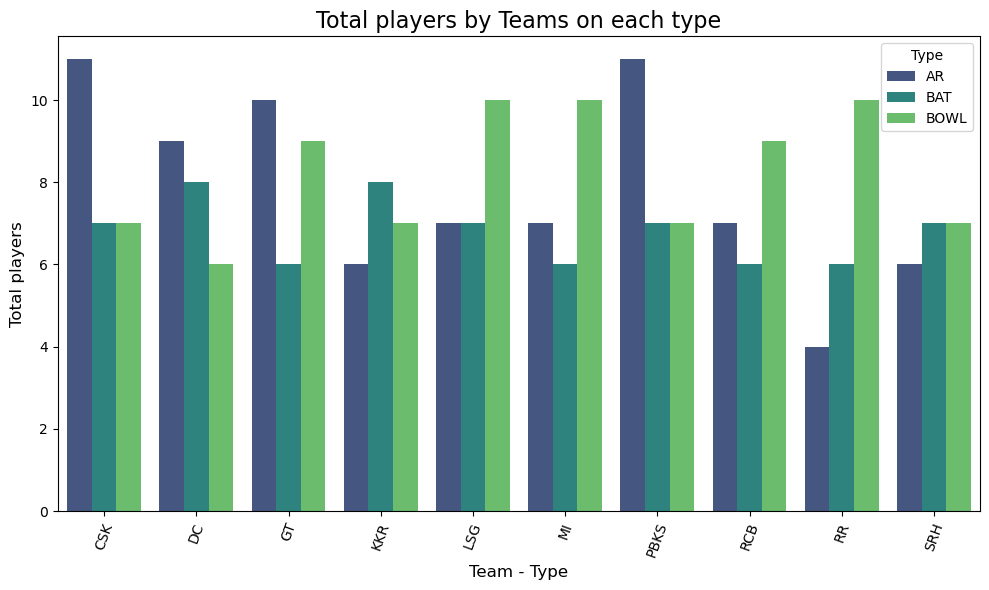

In [63]:
plt.figure(figsize=(10, 6))
sns.barplot(data=typewise_number, x='Team', y='Type_Count', palette='viridis',hue="Type")
plt.title('Total players by Teams on each type', fontsize=16)
plt.xlabel('Team - Type', fontsize=12)
plt.ylabel('Total players', fontsize=12)
plt.xticks(rotation=70)
plt.tight_layout()
plt.show()

#### Ques - Analysis every team spend pattern?
Ans - Check the above Bar graph 

In [125]:
categorywise =sold.groupby(['Type','Team']).agg({'Type':'size','Sold':'sum'}).rename(columns={'Type':'Total_players','Sold':'Total_value'}).reset_index()

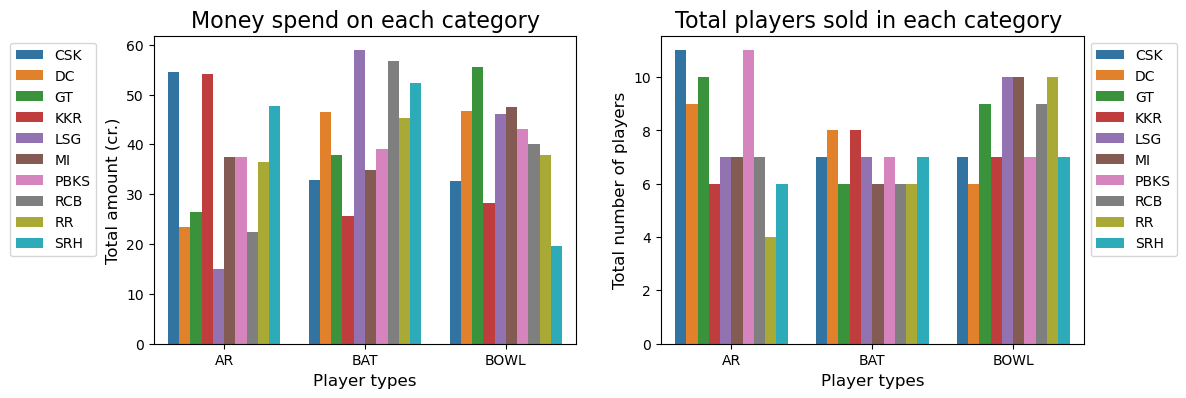

In [121]:
plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
sns.barplot(x=categorywise['Type'],y=categorywise['Total_value'],hue=categorywise['Team'])
plt.title('Money spend on each category',fontsize=16)
plt.xlabel('Player types',fontsize=12)
plt.ylabel('Total amount (cr.)',fontsize=12)
plt.legend(bbox_to_anchor=(-.12,1))

plt.subplot(1,2,2)
sns.barplot(x=categorywise['Type'],y=categorywise['Total_players'],hue=categorywise['Team'])
plt.title('Total players sold in each category ',fontsize=16)
plt.xlabel('Player types',fontsize=12)
plt.ylabel('Total number of players',fontsize=12)
plt.legend(bbox_to_anchor=(1,1))

plt.show()

#### Ques - Analysis every category of players who has got more money and who has got less money in auction?
Ans  - Check the above graph